<center><u><h1>NLP Assignment 4: ML based NLP Project <br>Sentiment Analysis</center></u></h1>




###<b>Welcome to the Assignment-4 of the NLP series!!</b><br>
Keep your devices ready as you have a lot of practical work in this assignment. Are you ready to get your hands dirty into code??<br>


<b><u>Sentiment Analysis</u></b><br>This assignment will guide you through a machine learning project on a NLP use case. The aim behind doing this project is to let you understand how NLP problems are solved using machine learning approach. So that further when we solve them using deep learning, you get to know the major differences between the approaches and which one is better to solve these use cases. Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative or neutral. This is the most common use case in NLP that has been studied,applied and solved by many experts using easy as well as state-of-the-art approaches. <br>

![image41.png](https://www.voxco.com/wp-content/uploads/2021/09/Sentiment-Analysis2.jpg)

<br>
<b><u>Prerequisite:</b></u> You should have completed all the previous assignments to enter into this project as some of the concepts from previous assignments have been applied here. Also some Basic knowledge of Logistic regression implementation is required here.<br>
if you don't know about Logistic regression,Kindly watch the video given below.



<br> <b><u>Problem to be solved:</b></u> Given a dataset containing some text related to a movie, the problem is to predict the sentiment behind the statement in the form of 0 and 1 label (0 for negative and 1 for positive)


Let's first begin with importing all the necessary libraries.Quickly go through the purpose of the libraries.<br>

1.   <b>Pandas</b>- for storing and analysing the data.
2.   <b>CountVectorizer</b>-to get the frequency of words.
3.   <b>re</b>-for locating and matching patterns in text.
4.   <b>PorterStemmer</b>-for stemming words.
5.   <b>nltk</b>-for accessing other packages like PorterStemmer and stopwords.
6.   <b>stopwords</b>-for removal os stopwords.
7.   <b>WordCloud</b>-for generating word cloud showing words according to their frequency in the text.
8.   <b>matplotlib</b>-for plotting some necessary graphs.
9.   <b>TfidVectorizer</b>-to generate word vectors based on the document weightage.






In [8]:
#importing pandas library
import pandas as pd
#import count vectorizer function from sklearn
from sklearn.feature_extraction.text import CountVectorizer
#importing re library 
import re
#Importing stemmer function from NLTK library
from nltk.stem.porter import PorterStemmer
#Importing NLTK library and stopwords.
from nltk.corpus import stopwords
#Importing Word cloud
from wordcloud import WordCloud
#Importing matplotlib library to plot pie chart.
import matplotlib.pyplot as plt
#importing tfiVectorizer from sklearn for feature extraction.
from sklearn.feature_extraction.text import TfidfVectorizer


After importing all the libraries, let's download the stopwords from nltk and load the english language stopwords in a variable using the words method from the stopwords class.

In [14]:
#downloading stopwords from nltk
#loading englsih stopwords in the 'stop' variable
stop = stopwords.words('english')

In the next cell,



1.   porter(any name can be chosen) object of the PorterStemmer class is created as object is an instance of the class that can implement all the methods and functionalities of the class.
2.   count(any name can be chosen) object of the CountVectorizer class is created as object is an instance of the class that can implement all the methods and functionalities of the class.






In [15]:
#creating objects of PorterStemmer and CountVectorizer class
porter = PorterStemmer()
count = CountVectorizer()

Next, we load the data into the 'data' variable using the 'read_csv' method from pandas. Don't forget to download the trainig data and upload it into the project location before implementing the project. Also we print the first five rows of the dataset using the 'head' method.



In [16]:
#Loading the data to the variable as DataFrame
sentiment_data = pd.read_csv('Train-2.csv')
sentiment_data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1



In the next part, we segregate the data based on the positive and negative labels. Text with positive label is stored in 'pos' variable and text with negative label is stored in 'neg' variable. 


In [17]:
#finding the positive Data
positive = sentiment_data[sentiment_data['label']==1]
print("Positive text \n",positive.head())
#try for negative Data
negative = sentiment_data[sentiment_data['label']==0]
print("Negative text \n", negative.head())

Positive text 
                                                  text  label
4   Im a die hard Dads Army fan and nothing will e...      1
6   Finally watched this shocking movie last night...      1
8   It may be the remake of 1987 Autumn's Tale aft...      1
9   My Super Ex Girlfriend turned out to be a plea...      1
10  I can't believe people are looking for a plot ...      1
Negative text 
                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
5  A terrible movie as everyone has said. What ma...      0


Here we can see that we have both postive and negative text in the data or dataset. So we can visulize the data by using matplotlib.





Now we plot a pie chart of the positive and negative data to understand the ratio of the data. Matplotlib library is used to plot the pie chart using various parameters. <br> Do refer to the given documentation to know more about the used parameters: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html


([<matplotlib.patches.Wedge at 0x7fb292d6ee80>,
 [Text(-1.0999987752985951, 0.0016414449704781394, 'positive'),
  Text(1.1999986639621039, -0.0017906672405217537, 'negative')],
 [Text(-0.5999993319810518, 0.0008953336202608032, '50.0%'),
  Text(0.6999992206445604, -0.0010445558903043562, '50.0%')])

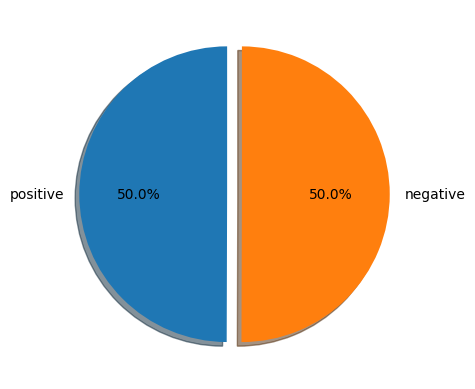

In [21]:
#Plotting the Postive vs Negative in piechart.
sizes = [positive.shape[0], negative.shape[0]]
labels = ['positive', 'negative']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, explode=[0,0.1])



We can see that the percentage of positive and negative data is equal i.e. 50% each. Which means that there is enough training data of both the classes.

Next, we define a preprocessing function using regular expressions to clean the data and remove unnecessary things in the text. <br>Any of the html tags are represented by '<[^>]*>' and replaced with a whitespace. Non word characters are replaced with a whitespace and the text is converted into lowercase. Emoji symbols in the text are joined at the end of the text by replacing the '-' in the emoji with a whitespace.
<br>
<br>Do refer to the given documentation to know more about Regular expressions: https://docs.python.org/3/library/re.html


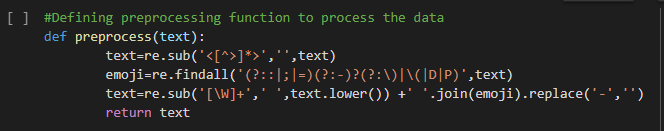

Write the above code in below cell for preprocessing



In [22]:
#Defining preprocessing function to process the data
def preprocessing(text):
    text = re.sub('<[^>]*>','',text)
    emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +" ".join(emoji).replace('_','')
    return text


The above defined function is now applied to each text in the row using the apply function in python.


In [23]:
#Applying the function preprocess on the data
sentiment_data['text'] = sentiment_data['text'].apply(preprocessing)

Lets display the top 5 rows of the preprocessed data to check exactly what changes have been made. We use the head function of pandas for this.

In [24]:
#Displaying the dataframe after applying the preprocessing using head().
sentiment_data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1



As we can see, all the text is converted into lowercase and other unnecessary stuff is removed.


Next, a function tokenize is defined which returns the spillted form of the text. The split function from strings is used for splitting the text into tokens. A sample sentence has been passed into the tokenizer function that we created to check the output.



In [26]:
#Defining a function called tokenizer which splits the sentence
def tokenizer(text):
    return text.split()
#your code here for splitting
tokenizer("I am making losses")

['I', 'am', 'making', 'losses']


Here, a function tokenizer_porter is defined that stems the splitted words using the stem function from PorterStemmer class.


In [28]:
#Defining function for Tokenizer porter
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]
#your code for here for porter
tokenizer_porter("I am making losses")

['i', 'am', 'make', 'loss']


Ahead we segregate the processed data into positive and negative data based on the labels.



In [29]:
#getting positive
positive_data = positive['text']
#try to get negative data
negative_data = negative['text']


Now we define a function that will plot the word cloud for our data. The words 'movie' and 'film' are ignored for cleaning the words. Next the wordcloud is formed by giving various parameters like stopwords, background colour, etc.
Refer to the given documentation: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/



In [35]:
#Defining the function to plot the data in wordcloud
def plot_wordcloud(data):
    words = ' '.join(data)
    clean_words =  " ".join([word for word in words.split() if(word != 'movie' and word != 'film')])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(clean_words)
 
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()


Now that we have the word cloud plotting function, we will plot the word cloud for the positive data using white background colour.


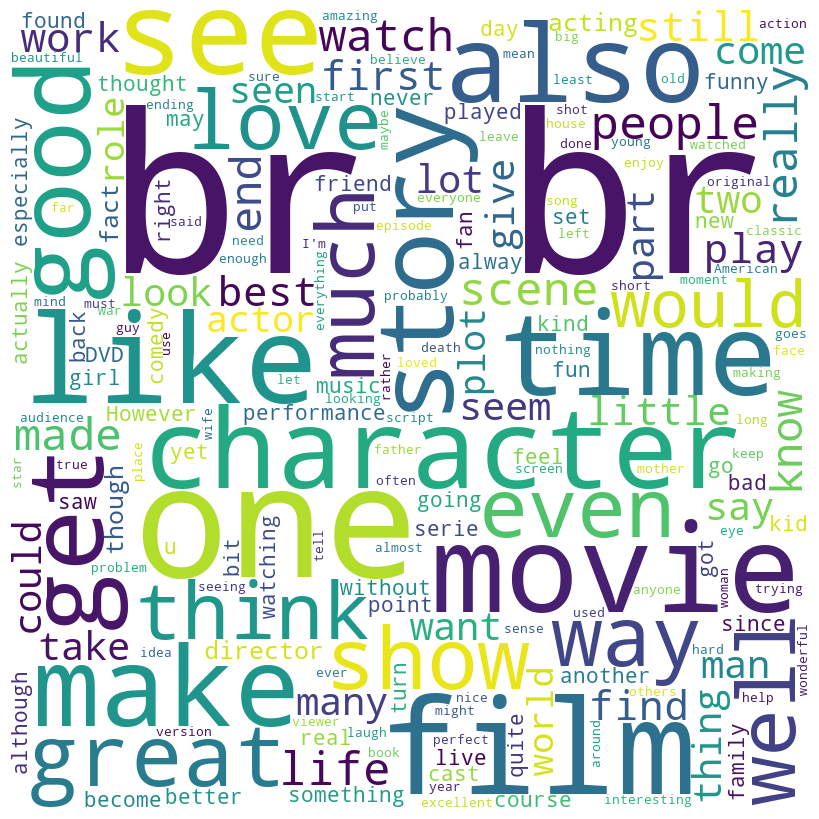

In [36]:
#Printing the positive data in wordcloud
#print("Positive words")
plot_wordcloud(positive_data)


The word cloud is plotted and we see that the most occuring words are one, like, character. Other words can also be seen with different frequencies.


Next, we will plot the word cloud for the negative data using black background colour.



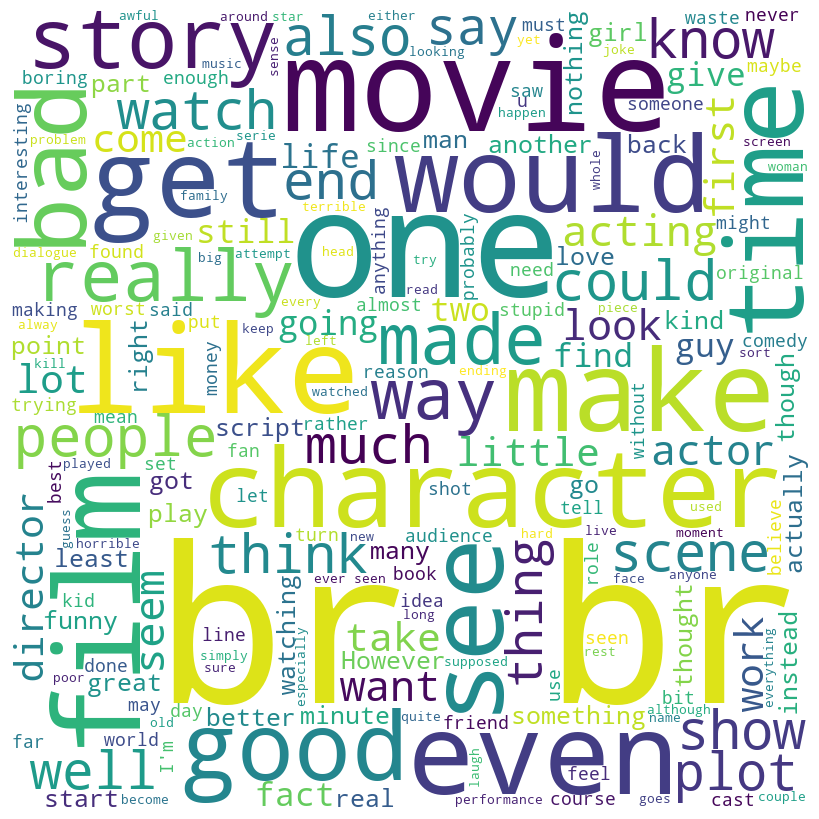

In [37]:
#Printing the negative data in wordcloud 
# try for negative words
plot_wordcloud(negative_data)


After plotting we see that words like even,one,like,character,get,scene,etc have higher frequencies of appearing in the text.

Next, tfid object of the TfidVectorizer class is created by giving various parameters. The tokenizer_porter function that we defined earlier has been passed as the tokenizer in this vectorizer. Know more about the parameters at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html



In [38]:
#using TfidVectorizer
tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer_porter)
#assigning values in y i.e label.values
y = sentiment_data.label.values


Next, the data is scaled using fit_transform function into the x variable which means that vectorization has been applied to the data and stored into the x variable which will be further used for training.


In [39]:
#scaling the data
x = tfidf.fit_transform(sentiment_data.text)

/Users/solo/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



It is time to split our data as it is now ready for further processing. train_test_split from sklearn helps us to do that. It will split the data into training and testing data so that we can check the model accuracy easily by referring or comparing with the original values in tha dataset. test size is taken as 0.5 which means that 50% of the data is for training and remaining 50% for testing. The splitted data is stored in four different variables.<br>
X_train: independent training data<br>
X_test: independent testing data<br>
y_train: prediction of the training data (labels in this case)<br>
y_test: prediction of the testing data(labels in this case)



In [40]:
 #splitting the train and test split using train_test_split function of sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)


Now we import the LogisticRegressionCV module from sklearn which will be used to train the model. This regressor comes with cross validation so that there is no need to implement cross validation seperately. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. For example, a logistic regression could be used to predict whether a political candidate will win or lose an election or whether a high school student will be admitted to a particular college. Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.
<br>

Refer the given documentation to know more about LogisticRegressionCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
<br>
<br>



A model is created by passing various parameters. Number of folds in cross validation is given as 6, scoring is estimated based on accuracy and maximum iterations are set to 500 (you may try out with some other values). The model is then fitted on the training data and further predicted on the test data(X_train) to get y_pred which is the predicted labels.



In [47]:
#Importing Logisitic RegressionCV from sklearn library
from sklearn.linear_model import LogisticRegressionCV
#create model of LogisticRegression of cv=6,scoring of accuracy and max_iter=500 
model = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0, max_iter=500)
#fiting our model 
model.fit(X_train, y_train)
#making predication using predict
y_pred = model.predict(X_test)


Wohoo!! our model is trained. Its time to check how well it has learnt everything. For that we use accuracy_score from metrics package of the sklearn library. The predicted labels and actual test labels are passed as parameters to get the accuracy score.


In [48]:
#Importing metrics from sklesrn to calculate accuracy
from sklearn import metrics
# Accuracy of our built model
print("Accyracy of our model:", metrics.accuracy_score(y_test, y_pred))

Accyracy of our model: 0.89205



That's cool, 89% is the accuracy of our model. <br> We have come to an end of this project but don't stop here, try as many projects of the similar type to get a better understanding of the use cases. Solve the practice sheet of this project to test yourself.!!


